### Gradient Descent: Batch, Stochastic, and Mini-Batch with Python from scratch
This notebook explores the three main variants of gradient descent: batch, stochastic, and mini-batch, using a dataset from Kaggle: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?resource=download.

This dataset comprises 545 instances and 13 features, including house prices (value to predict) and features of each house such as: area, bedrooms, bathrooms, etc. However, the models utilizes only four features: area, bedrooms, bathrooms, and stories.

Finally, a LinearRegression model from scikit-learn was trained to compare the performance of the gradient descent implementations with the standard implementation of LinearRegression.

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# load dataset with pandas
X = pd.read_csv('housing.csv')

# select just first 5 columns
X = X.iloc[:, :5]

# split features and labels
y = X.iloc[:, 0]
y = np.resize(y, (545, 1)) # labels (prices)
X = X.iloc[:, 1:5] # features (area (ft2), bedrooms, bathrooms, stories)

# declare scalers
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# scale both X and y 
X = X_scaler.fit_transform(X.values)
y = y_scaler.fit_transform(y)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# number of instances in the training set
m = X_train.shape[0]

# X_train without bias term for LinearRegression scikit-learn model
X_train_no_bias = X_train

# add bias term to training set only
X_train = np.c_[np.ones((m, 1)), X_train]

Gradient Descent Batch - Optimal parameters:
[[0.01138202]
 [0.41322787]
 [0.08022675]
 [0.3420249 ]
 [0.22974953]]


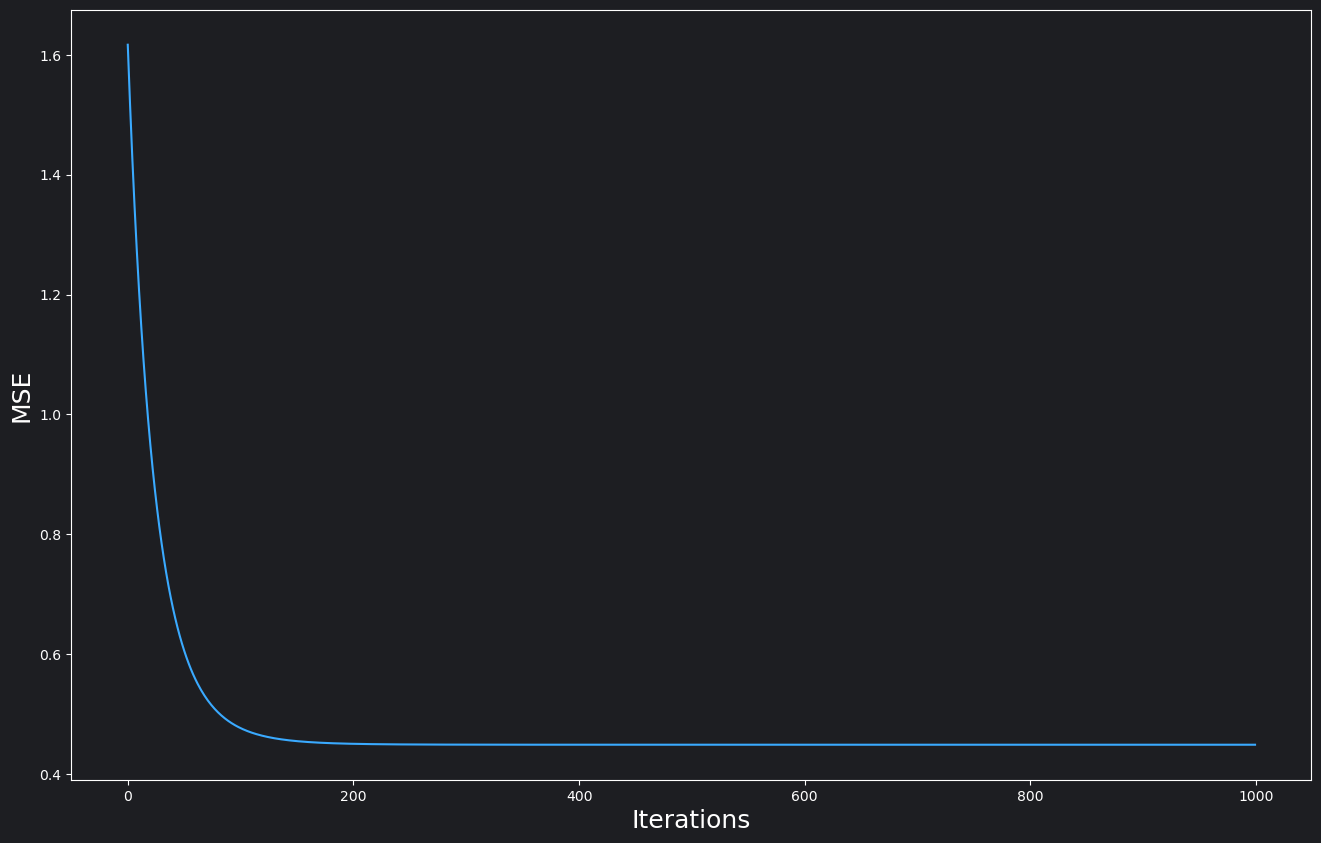

In [2]:
# Gradient Descent Batch
eta_batch = 0.01 # learning rate
n_iterations_batch = 1000
theta_batch = np.random.rand(X_train.shape[1], 1) # initial random values for params

cost_batch = [] # arr to store the mse on each iteration
iterations_batch = [] # arr to store the no. of iteration on each iteration

# change in theta across each iteration
theta0_batch = []
theta1_batch = []

for iteration in range(n_iterations_batch):
    gradients_batch = (2/m) * (X_train.T.dot(X_train.dot(theta_batch) - y_train)) # gradient vector of cost function
    theta_batch = theta_batch - (eta_batch * gradients_batch) # update params
    mse_batch = np.square(np.subtract(X_train.dot(theta_batch), y_train)).mean() # calculate MSE (error)
    cost_batch.append(mse_batch) # append current MSE value to arr
    iterations_batch.append(iteration) # append current no. of iteration to arr
    theta0_batch.append(theta_batch[0]) # save current theta0 value to plot
    theta1_batch.append(theta_batch[1]) # save current theta1 value to plot
    
print(f"Gradient Descent Batch - Optimal parameters:\n{theta_batch}") # print optimal params

# change plot's background color
plt.figure(facecolor='#1D1E22')
ax = plt.axes()
ax.set_facecolor('#1D1E22')

figure = plt.gcf()  # get current figure
figure.set_size_inches(16, 10) # set figure's size manually to your full screen (32x18)

# change axis colors
ax.set_xlabel('Iterations', fontsize=18)
ax.set_ylabel('MSE', fontsize=18)
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# plot the MSE (y-axis) decrease on each iteration (x-axis)
plt.plot(iterations_batch, cost_batch, color="#3aaaff")

# save plot locally
#plt.savefig('gradient_descent_batch_mse.png', bbox_inches='tight', transparent=True)
plt.show()

Gradient Descent Stochastic - Optimal parameters:
[[0.0383848 ]
 [0.28341926]
 [0.12189988]
 [0.33495008]
 [0.26127411]]


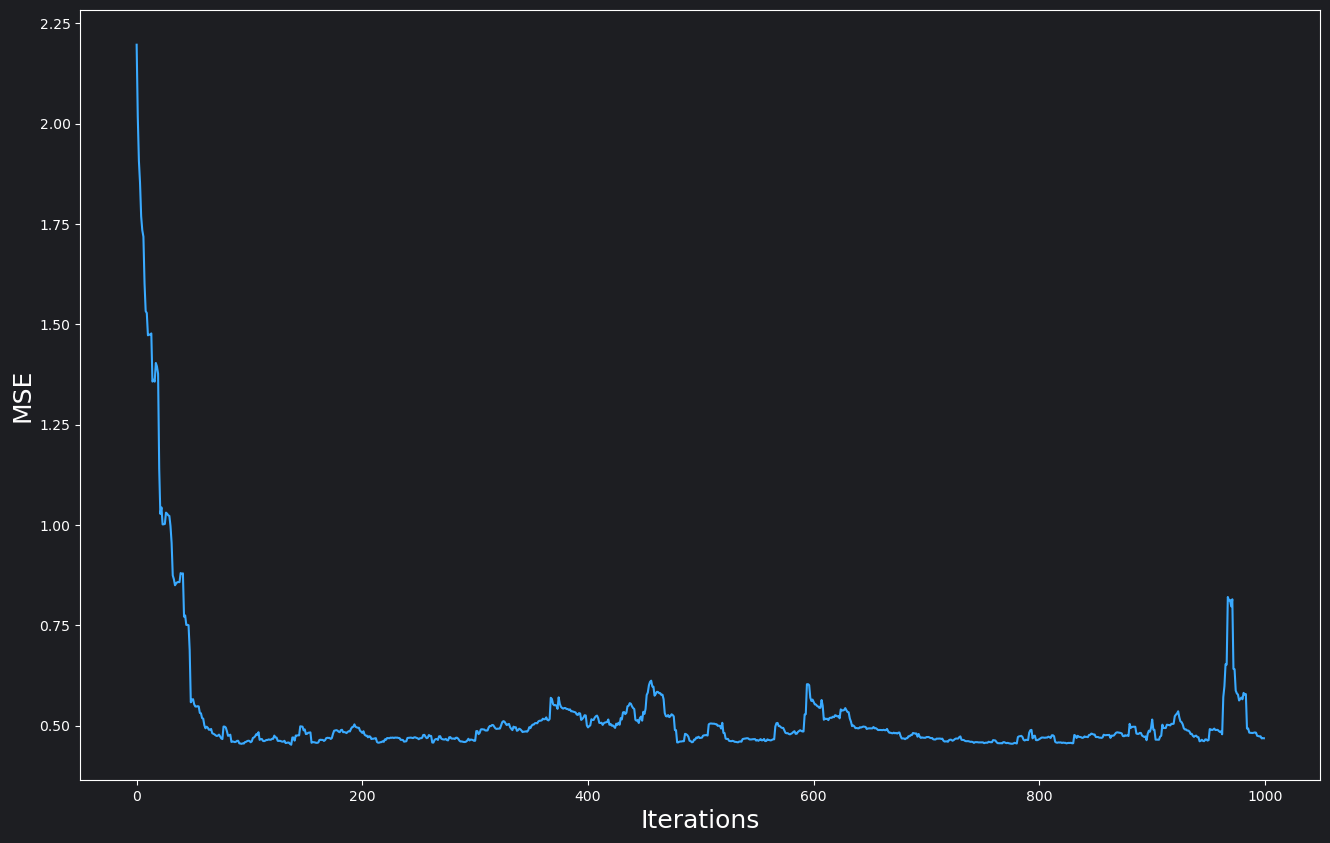

In [3]:
# stochastic
eta_sgd = 0.01 # learning rate
n_iterations_sgd = 1000
theta_sgd = np.random.rand(X_train.shape[1], 1) # initial random values for params

cost_sgd = [] # arr to store the mse on each iteration
iterations_sgd = [] # arr to store the no. of iteration on each iteration

# change in theta across each iteration
theta0_sgd = []
theta1_sgd = []

for iteration in range(n_iterations_sgd):
    rand_indx_sgd = np.random.randint(m) # select random index
    xi = X_train[rand_indx_sgd:rand_indx_sgd + 1] # select random instance with random index
    yi = y_train[rand_indx_sgd:rand_indx_sgd + 1] # select random label with random index
    gradients_sgd = 2 * xi.T.dot(xi.dot(theta_sgd) - yi) # gradient vector of cost function (using a single instance and label)
    theta_sgd = theta_sgd - (eta_sgd * gradients_sgd) # update params
    mse_sgd = np.square(np.subtract(X_train.dot(theta_sgd), y_train)).mean() # calculate MSE (error)
    cost_sgd.append(mse_sgd) # append current MSE value to arr
    iterations_sgd.append(iteration) # append current no. of iteration to arr
    theta0_sgd.append(theta_sgd[0]) # save current theta0 value to plot
    theta1_sgd.append(theta_sgd[1]) # save current theta1 value to plot

print(f"Gradient Descent Stochastic - Optimal parameters:\n{theta_sgd}") # print optimal params

# change plot's background color
plt.figure(facecolor='#1D1E22')
ax = plt.axes()
ax.set_facecolor('#1D1E22')

# change fig size
figure = plt.gcf()
figure.set_size_inches(16, 10)

# change axis colors
ax.set_xlabel('Iterations', fontsize=18)
ax.set_ylabel('MSE', fontsize=18)
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# plot the MSE (y-axis) decrease on each iteration (x-axis)
plt.plot(iterations_sgd, cost_sgd, color="#3aaaff")

# save plot locally
#plt.savefig('gradient_descent_sgd_mse.png', bbox_inches='tight', transparent=True)
plt.show()

Gradient Descent Mini-batch - Optimal parameters:
[[0.00727054]
 [0.40487591]
 [0.04025805]
 [0.32808867]
 [0.2269371 ]]


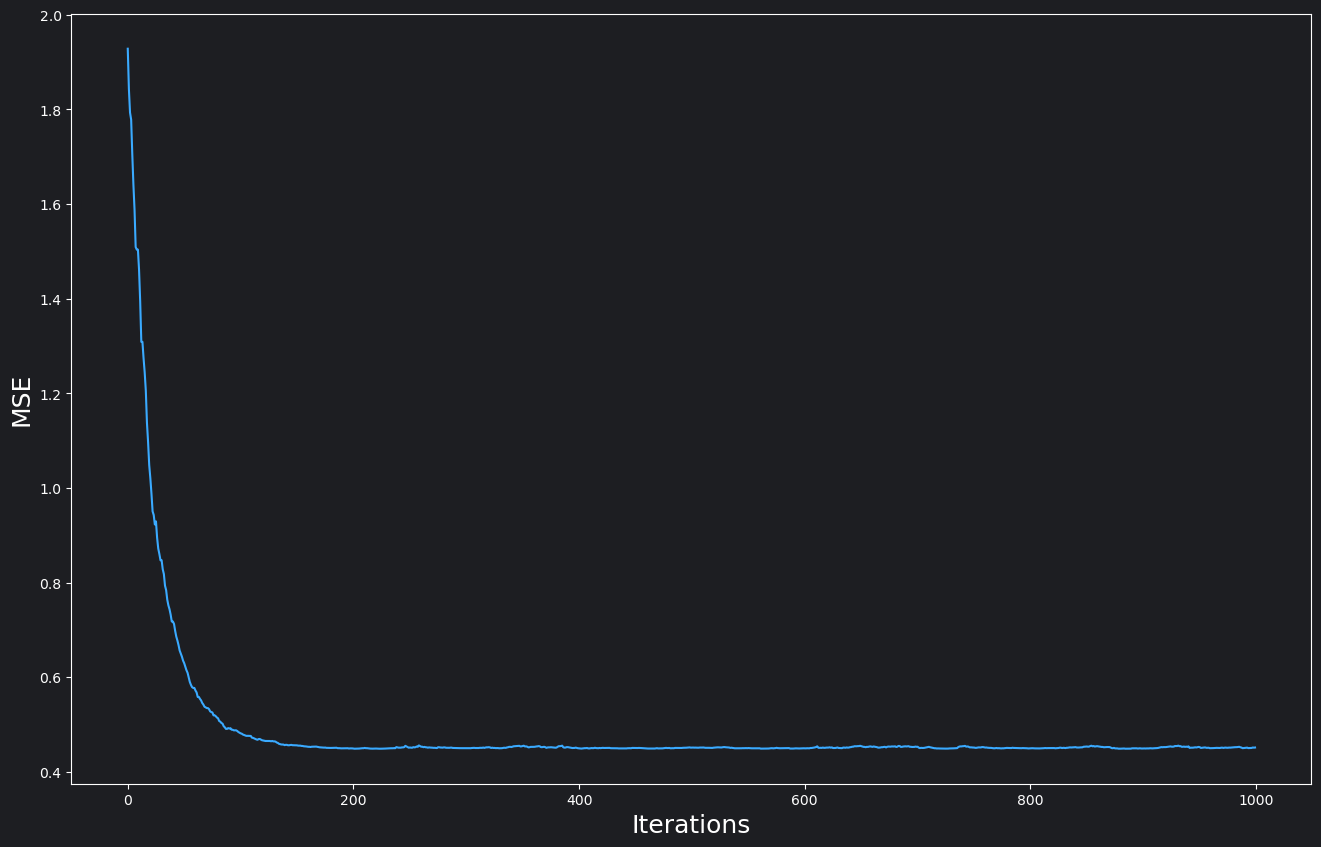

In [4]:
# mini-batch
eta_mini = 0.01 # learning rate
batch_size = 16 # set batch size (16 o 32 is perfect)
n_iterations_mini = 1000
theta_mini = np.random.rand(X_train.shape[1], 1) # initial random values for params

cost_mini = [] # arr to store the mse on each iteration
iterations_mini = [] # arr to store the no. of iteration on each iteration

# change in theta across each iteration
theta0_mini = []
theta1_mini = []

for iteration in range(n_iterations_mini):
    rand_indx_mini = np.random.randint(0, high=513, size=1)[0] # select random index
    X_mini_batch = X_train[rand_indx_mini:rand_indx_mini + batch_size] # select a random batch (with 16 instances in this case)
    y_mini_batch = y_train[rand_indx_mini:rand_indx_mini + batch_size] # select a random batch (with 16 labels in this case)
    gradients_mini = (2/batch_size) * (X_mini_batch.T.dot(X_mini_batch.dot(theta_mini) - y_mini_batch)) # gradient vector of cost function (using a mini batch of 16 instances and labels)
    theta_mini = theta_mini - (eta_mini * gradients_mini) # update params
    mse_mini = np.square(np.subtract(X_train.dot(theta_mini), y_train)).mean() 
    cost_mini.append(mse_mini) # append current MSE value to arr
    iterations_mini.append(iteration) # append current no. of iteration to arr
    theta0_mini.append(theta_mini[0]) # save current theta0 value to plot
    theta1_mini.append(theta_mini[1]) # save current theta1 value to plot

print(f"Gradient Descent Mini-batch - Optimal parameters:\n{theta_mini}") # print optimal params

# change plot's background color
plt.figure(facecolor='#1D1E22')
ax = plt.axes()
ax.set_facecolor('#1D1E22')

# change fig size
figure = plt.gcf()
figure.set_size_inches(16, 10)

# change axis colors
ax.set_xlabel('Iterations', fontsize=18)
ax.set_ylabel('MSE', fontsize=18)
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# plot the MSE (y-axis) decrease on each iteration (x-axis)
plt.plot(iterations_mini, cost_mini, color="#3aaaff")

# save plot locally
#plt.savefig('gradient_descent_mini_mse.png', bbox_inches='tight', transparent=True)
plt.show()

In [5]:
lin_reg = LinearRegression() # linear model from sklearn
lin_reg.fit(X_train_no_bias, y_train) # train model
print(f"Linear Regression (scikit-learn) - Optimal parameters:\n{np.c_[lin_reg.intercept_, lin_reg.coef_]}") # print optimal params

Linear Regression (scikit-learn) - Optimal parameters:
[[0.01138224 0.413228   0.0802236  0.34202636 0.22975159]]


In [6]:
# test params from all variants by predicting the same features (test instance)
def predict_all(features):
    # scale values
    features_scaled = X_scaler.transform(features)
    features_scaled_no_bias = features_scaled # for lin_reg model
    
    # add bias term
    features_scaled = np.insert(features_scaled, 0, 1)

    # vector calculation (predictions)
    batch = features_scaled.dot(theta_batch)
    stochastic = features_scaled.dot(theta_sgd)
    mini_batch = features_scaled.dot(theta_mini)

    # predict with lin reg model (for reference only)
    linear_reg = lin_reg.predict(features_scaled_no_bias)
    
    # return to normal values (remove scaler)
    batch = y_scaler.inverse_transform([batch])
    stochastic = y_scaler.inverse_transform([stochastic])
    mini_batch = y_scaler.inverse_transform([mini_batch])
    linear_reg = y_scaler.inverse_transform([[linear_reg[0][0]]])

    # print results
    print(f"Original Price: {7350000}\nPredictions ---------------------------------------\nGradient Descent Batch: {batch[0][0]}\nGradient Descent Stochastic: {stochastic[0][0]}\nGradient Descent Mini-Batch: {mini_batch[0][0]}\nLinear Regression (scikit-learn): {linear_reg[0][0]}")

predict_all([[5150, 3, 2, 2]]) # area (ft2), bedrooms, bathrooms, stories

Original Price: 7350000
Predictions ---------------------------------------
Gradient Descent Batch: 5799992.799470864
Gradient Descent Stochastic: 5848618.423942112
Gradient Descent Mini-Batch: 5750574.641634105
Linear Regression (scikit-learn): 5799997.665728622


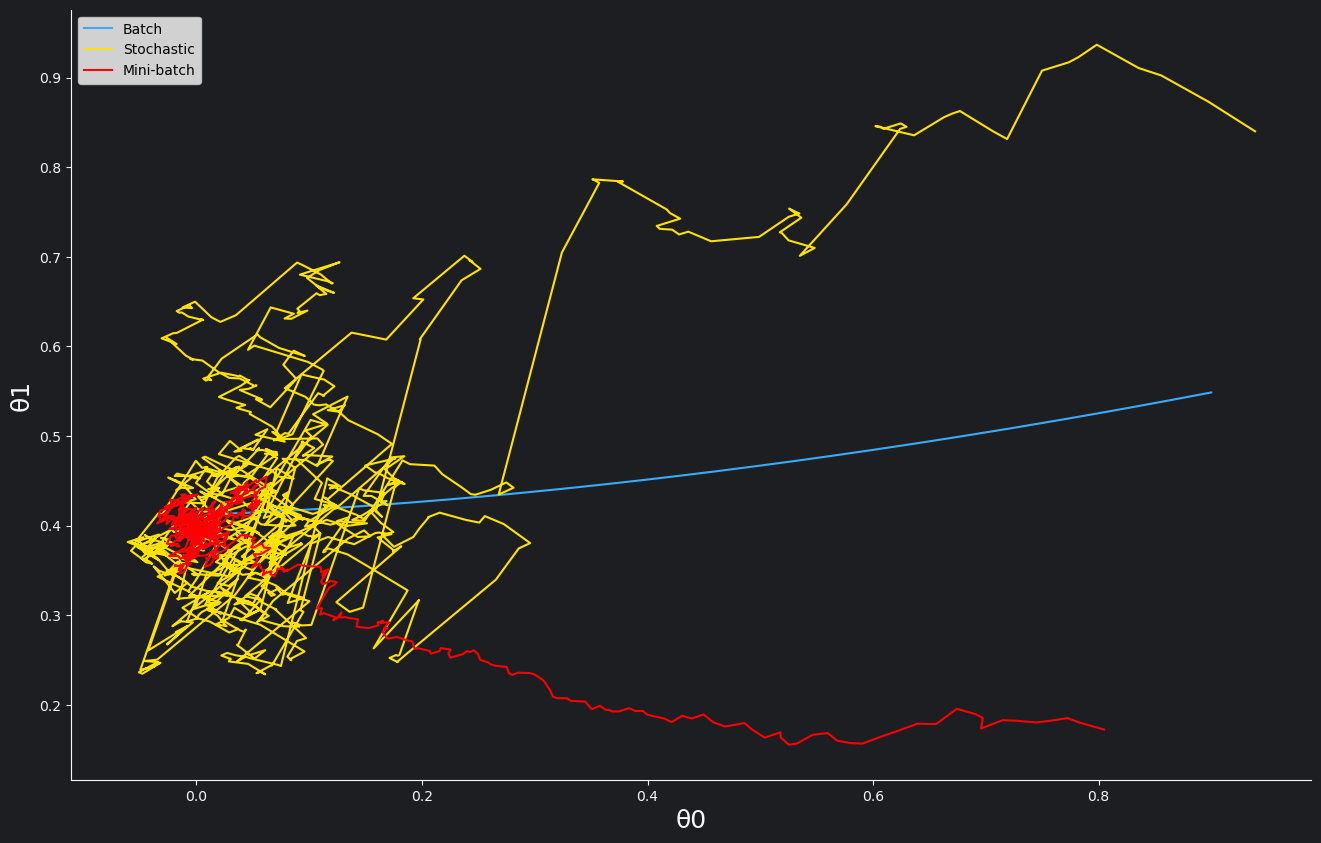

In [8]:
# finally, plot how theta0 and theta1 change on each iteration
# change plot's background color
plt.figure(facecolor='#1D1E22')
ax = plt.axes()
ax.set_facecolor('#1D1E22')

# change fig size
figure = plt.gcf()
figure.set_size_inches(16, 10)

# change axis colors
ax.set_xlabel('θ0', fontsize=18)
ax.set_ylabel('θ1', fontsize=18)
ax.spines[['right', 'top']].set_visible(False)
ax.spines['bottom'].set_color('#f7f7f7')
ax.spines['left'].set_color('#f7f7f7')
ax.xaxis.label.set_color('#f7f7f7')
ax.yaxis.label.set_color('#f7f7f7')
ax.tick_params(axis='x', colors='#f7f7f7')
ax.tick_params(axis='y', colors='#f7f7f7')

# plot the theta0 (x-axis) and theta1 (y-axis) change on each iteration
plt.plot(theta0_batch, theta1_batch, color="#3aaaff", label='Batch') # batch
plt.plot(theta0_sgd, theta1_sgd, color="#ffe203", label='Stochastic') # stochastic
plt.plot(theta0_mini, theta1_mini, color="#ff0000", label='Mini-batch') # mini-batch
plt.legend(loc='upper left')

# save plot locally
#plt.savefig('params_change.png', bbox_inches='tight', transparent=True)
plt.show()